### CERN Electron Mass Prediction

<p align="center">
  <img src="assets/images/2.png" width="50%" style="margin-right:10px;">
  <img src="assets/images/3.png" width="44%">
</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

### Dateset load and info

In [11]:
# Load dataset
df = pd.read_csv('dielectron.csv')

# Display the first five rows
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [16]:
# Diplay basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [13]:
# Summary statistics
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


In [15]:
# Check for null or missing values
df.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

### Dataset visualization
##### Distribution of the Target Variable (M - Invariant Mass)

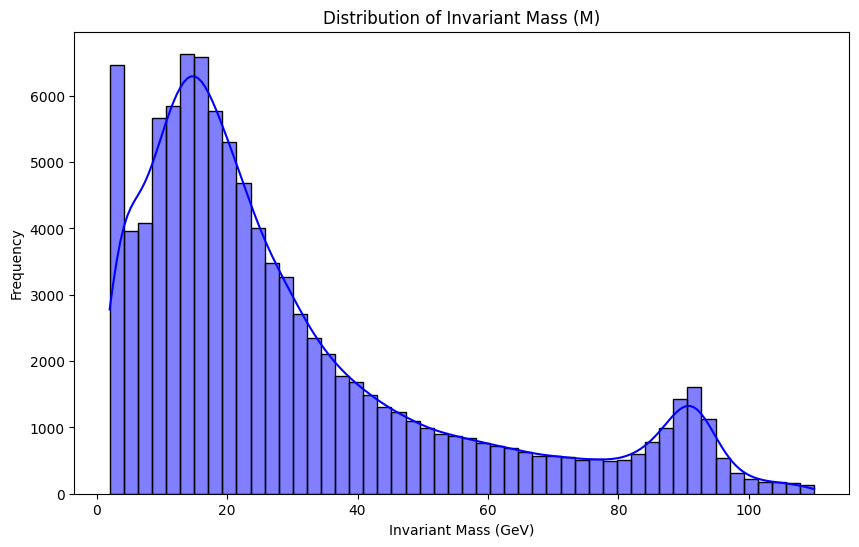

In [27]:
# Histogram of the target variable
plt.figure(figsize=(10,6))
sns.histplot(df['M'], kde=True, bins=50, color='blue')
plt.title('Distribution of Invariant Mass (M)')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Frequency')
plt.show()

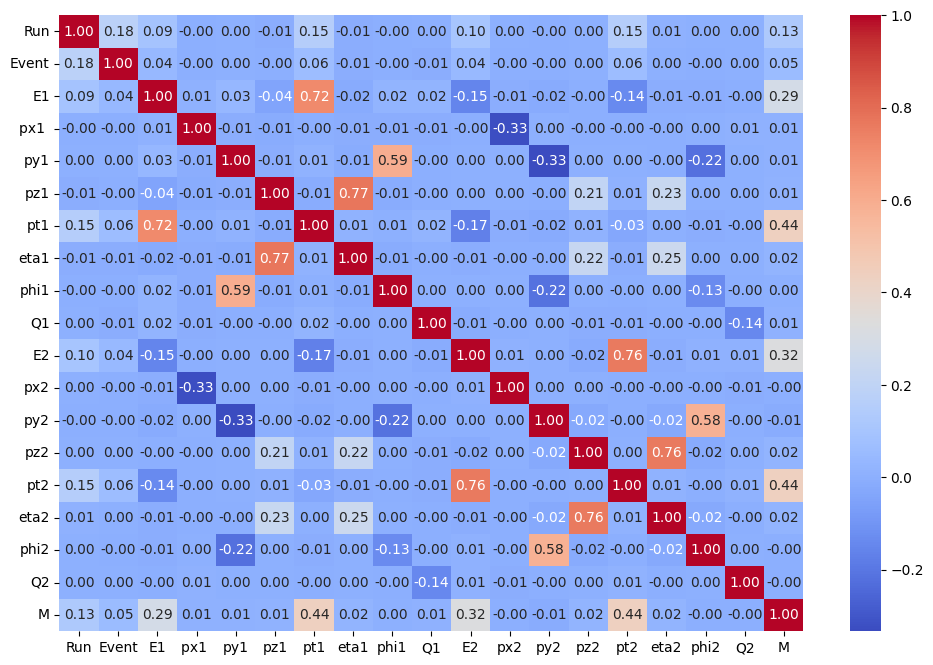

In [29]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

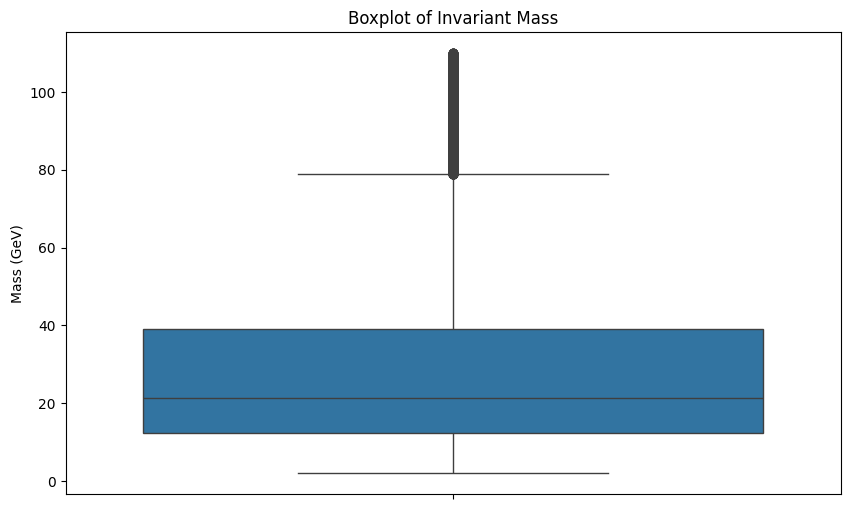

In [30]:
# Boxplot for particle mass
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['M'])
plt.title('Boxplot of Invariant Mass')
plt.ylabel('Mass (GeV)')
plt.show()

#### Preprocessing data

In [32]:
# Fill missing values of Mass with the mean
df['M'].fillna(df['M'].mean(), inplace=True)
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  23


In [35]:
# Drop duplicate rows
df = df.drop_duplicates()
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


In [36]:
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,99977.000000,9.997700e+04,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000
mean,147935.444972,4.957273e+08,36.436050,0.136422,0.182525,-1.511318,14.411852,-0.064172,0.021571,-0.005451,44.005046,-0.003445,0.124291,-1.588849,13.802947,-0.072845,0.021280,-0.004251,30.020881
std,920.332410,4.038148e+08,41.214202,13.404566,13.470672,51.601666,12.389097,1.462154,1.799564,0.999990,46.752755,13.127970,13.169872,61.432520,12.461194,1.738055,1.816935,0.999996,25.245194
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023271e+08,8.457250,-5.233210,-5.277350,-15.861800,3.770630,-1.283920,-1.527180,-1.000000,11.057200,-4.794580,-4.607830,-22.036900,3.738800,-1.892320,-1.556920,-1.000000,12.454400
50%,147929.000000,3.902231e+08,21.717100,0.141213,0.098888,-0.313493,12.967500,-0.061290,0.034367,-1.000000,25.265200,-0.034957,0.083522,-0.690668,11.692800,-0.136034,0.026967,-1.000000,21.304700
75%,149011.000000,6.340532e+08,50.018100,5.714980,5.648000,13.209800,20.019000,1.144400,1.562340,1.000000,66.926800,4.820140,5.062070,19.008400,19.597500,1.768260,1.596570,1.000000,38.992700
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


#### Splitting data

In [37]:
# Feature and target separation
X = df.drop(columns='M', axis=1)
y = df['M']

# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Hyperparameter tuning with GridSearchCV

In [38]:
param_grid_xgb = {
    'max_depth': [6, 8],
    'eta': [0.01, 0.1, 0.2],                    # Learning rate
    'subsample': [0.7, 0.8, 1.0],
    'reg_lambda': [1, 5, 10],                   # L2 regularization term
}

param_grid_rf = {
    'n_estimators': [100, 300],                 # Number of trees
    'max_depth': [6, 8],                        # Maximum depth of the trees
    'min_samples_split': [2, 5],                # Minimum samples to split a node
    'max_features': ['sqrt', 'log2', None]      # Number of features to consider for splits
}

param_grid_lgbm = {
    'max_depth': [6, 8],                        # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],          # Learning rate (similar to XGBoost's eta)
    'subsample': [0.7, 1.0],                    # Fraction of data to use for training
    'reg_lambda': [1, 5, 10],                   # L2 regularization term
    'n_estimators': [100, 300]                  # Number of boosting iterations
}

#### XGBoost Regressor

In [39]:
# Initialize XGB
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [40]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [41]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Save the best estimator
best_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.7; total time=   4.1s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.7; total time=   4.1s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.7; total time=   4.1s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.7; total time=   4.1s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.7; total time=   4.0s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END .eta=0.01, max_depth=6, reg_lambda=1, 

#### Model Training and Evaluation For XGBoost

In [44]:
# Train model with best parameters
best_xgb.fit(X_train, y_train)

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² score: 0.9790
Mean Squared Error (MSE): 13.17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


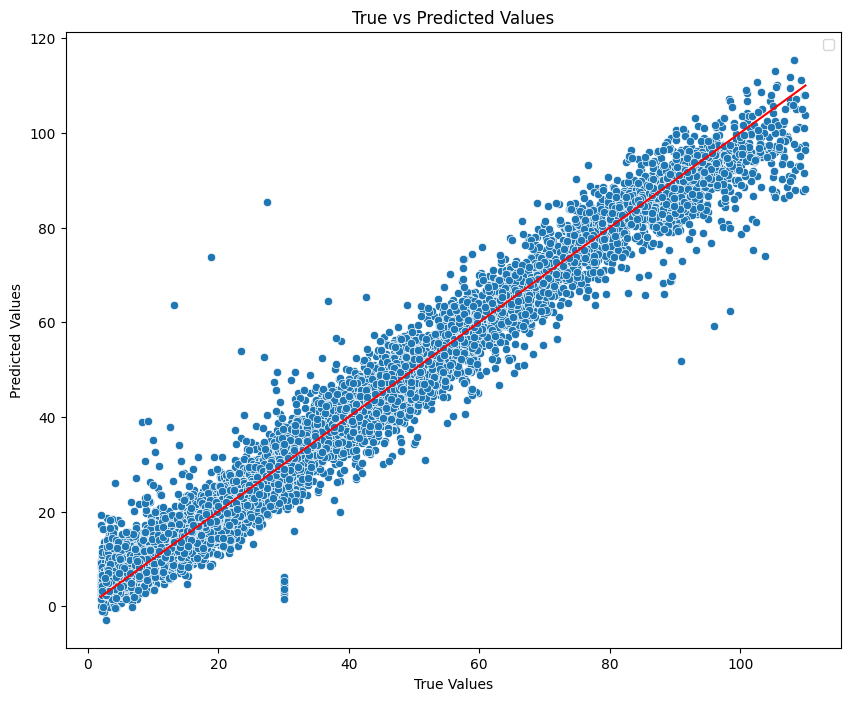

In [45]:
# Plotting
plt.figure(figsize=(10, 8))
# Define the limits for the plot
xgbMin, xgbMax = y_test.min(), y_test.max()
sns.lineplot(x=[xgbMin, xgbMax], y=[xgbMin, xgbMax], color='red')
sns.scatterplot(x=y_test, y=y_pred);

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
# plt.grid(True)
plt.show()

#### Cross-Validation Evaluation For XGBoost

In [46]:
# Perform cross-validation on the best estimator
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')

# Report cross-validation results
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R² Scores: {cv_scores.std():.4f}")

Cross-Validation R² Scores: [0.97872512 0.98011315 0.97968329 0.97897562 0.97867793]
Mean R² Score: 0.9792
Standard Deviation of R² Scores: 0.0006


## Random Forest Regressor

In [47]:
# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

In [48]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid_rf,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

In [ ]:
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

# Save the best estimator
best_rf = grid_search_rf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  32.9s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  33.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  33.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  33.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  29.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=300; total time= 1.4min
[CV] END max_depth=6, max_features=sqrt, min_sa

In [ ]:
# Train the model with the best parameters
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model performance
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"R² score (Random Forest): {r2_rf:.4f}")
print(f"Mean Squared Error (MSE) (Random Forest): {mse_rf:.2f}")

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
sns.scatterplot(x=y_test, y=y_pred_rf)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Random Forest)')
plt.legend()
plt.show()

In [ ]:
# Perform cross-validation on the best estimator
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Report cross-validation results
print(f"Cross-Validation R² Scores (Random Forest): {cv_scores_rf}")
print(f"Mean R² Score (Random Forest): {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation of R² Scores (Random Forest): {cv_scores_rf.std():.4f}")

## LightGBM Regressor

In [ ]:
# Initialize the LightGBM Regressor
lgbm_reg = LGBMRegressor(random_state=42)

In [ ]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_reg,
    param_grid=param_grid_lgbm,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

In [ ]:
# Fit GridSearchCV to the training data
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_lgbm = grid_search_lgbm.best_params_
print("Best Hyperparameters (LightGBM):", best_params_lgbm)

# Save the best estimator
best_lgbm = grid_search_lgbm.best_estimator_

#### Training and Evaluation For LightGBM

In [ ]:
# Train the model with the best parameters
best_lgbm.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluate the model performance
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

print(f"R² score (LightGBM): {r2_lgbm:.4f}")
print(f"Mean Squared Error (MSE) (LightGBM): {mse_lgbm:.2f}")

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
sns.scatterplot(x=y_test, y=y_pred_lgbm)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (LightGBM)')
plt.legend()
plt.show()

#### Cross-Validation Evaluation For LightGBM

In [ ]:
# Perform cross-validation on the best estimator
cv_scores_lgbm = cross_val_score(best_lgbm, X_train, y_train, cv=5, scoring='r2')

# Report cross-validation results
print(f"Cross-Validation R² Scores (LightGBM): {cv_scores_lgbm}")
print(f"Mean R² Score (LightGBM): {cv_scores_lgbm.mean():.4f}")
print(f"Standard Deviation of R² Scores (LightGBM): {cv_scores_lgbm.std():.4f}")